In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

DATA preprocessing


Training image preprocessing

In [9]:
training_set= tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    
    
)

Found 70295 files belonging to 38 classes.


Validation image preprocessing

In [10]:
validation_set= tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    
    
)

Found 17572 files belonging to 38 classes.


In [11]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

Building model

In [12]:
cnn= tf.keras.models.Sequential()

#Building convolution layer

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [14]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [15]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [16]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [17]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [18]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [19]:
cnn.add(tf.keras.layers.Flatten())

In [20]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))


In [21]:
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax')) #output layer

Compling and training phase

In [22]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [23]:

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [24]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 194s 86ms/step - loss: 1.0514 - accuracy: 0.6864 - val_loss: 0.4210 - val_accuracy: 0.8643
Epoch 2/10
2197/2197 [==============================] - 187s 85ms/step - loss: 0.3559 - accuracy: 0.8865 - val_loss: 0.3161 - val_accuracy: 0.8977
Epoch 3/10
2197/2197 [==============================] - 186s 85ms/step - loss: 0.2240 - accuracy: 0.9273 - val_loss: 0.1828 - val_accuracy: 0.9417
Epoch 4/10
2197/2197 [==============================] - 187s 85ms/step - loss: 0.1517 - accuracy: 0.9501 - val_loss: 0.1701 - val_accuracy: 0.9450
Epoch 5/10
2197/2197 [==============================] - 187s 85ms/step - loss: 0.1170 - accuracy: 0.9612 - val_loss: 0.1653 - val_accuracy: 0.9483
Epoch 6/10
2197/2197 [==============================] - 186s 85ms/step - loss: 0.0955 - accuracy: 0.9691 - val_loss: 0.1522 - val_accuracy: 0.9523
Epoch 7/10
2197/2197 [==============================] - 187s 85ms/step - loss: 0.0765 - accuracy: 0.9741 - val_loss: 0

#Evaluating model


In [31]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 [==============================] - 56s 26ms/step - loss: 0.0261 - accuracy: 0.9912
Training accuracy: 0.991165816783905


In [32]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 14s 26ms/step - loss: 0.1183 - accuracy: 0.9642
Validation accuracy: 0.9642044305801392


#saving model

In [25]:
cnn.save('trained_plant_disease_model.keras')

In [26]:
training_history.history

{'loss': [1.0514121055603027,
  0.3559059500694275,
  0.22404947876930237,
  0.1516658365726471,
  0.11696812510490417,
  0.09549692273139954,
  0.07651393860578537,
  0.06594027578830719,
  0.057395223528146744,
  0.04957803338766098],
 'accuracy': [0.686350405216217,
  0.8865068554878235,
  0.9272636771202087,
  0.9501102566719055,
  0.961206316947937,
  0.9690589904785156,
  0.9740806818008423,
  0.9779358506202698,
  0.9813215732574463,
  0.9841240644454956],
 'val_loss': [0.42096415162086487,
  0.3161396086215973,
  0.18283218145370483,
  0.17010587453842163,
  0.1652846336364746,
  0.15223929286003113,
  0.1321844756603241,
  0.15207776427268982,
  0.16450124979019165,
  0.11827056854963303],
 'val_accuracy': [0.8643296360969543,
  0.8976781368255615,
  0.9416685700416565,
  0.945026159286499,
  0.9482699632644653,
  0.9523105025291443,
  0.9602777361869812,
  0.954757571220398,
  0.9535624980926514,
  0.9642044305801392]}

In [27]:
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [28]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


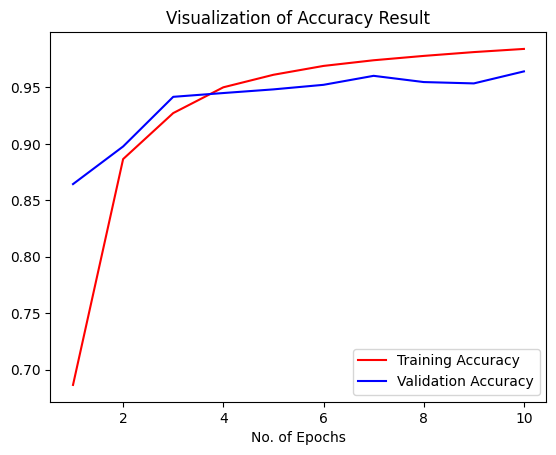

In [29]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [30]:
print("Validation set accuracy: {:.2f}%".format(training_history.history['val_accuracy'][-1] * 100))


Validation set accuracy: 96.42%


In [63]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [64]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [65]:
y_pred = cnn.predict(test_set)
y_pred,y_pred.shape


17572/17572 [==============================] - 61s 3ms/step


(array([[1.0000000e+00, 2.0327147e-10, 6.5063809e-12, ..., 4.0942592e-19,
         2.5178925e-18, 1.5217308e-17],
        [1.0000000e+00, 1.0426001e-11, 6.7574661e-12, ..., 3.9789677e-17,
         2.4967072e-18, 1.9324233e-16],
        [1.0000000e+00, 2.6443631e-13, 4.7684751e-12, ..., 4.8935533e-20,
         7.8689252e-19, 2.2979805e-16],
        ...,
        [1.6507503e-08, 1.6490609e-11, 5.8501858e-08, ..., 4.0035170e-10,
         4.0179751e-10, 9.9993694e-01],
        [3.5685391e-10, 3.0578319e-15, 1.6531202e-11, ..., 4.6606854e-13,
         9.9550590e-14, 9.9999988e-01],
        [1.0074671e-11, 9.3685042e-14, 6.5683017e-13, ..., 1.0848953e-13,
         3.4023018e-10, 9.9999106e-01]], dtype=float32),
 (17572, 38))

In [66]:
predicted_categories = tf.argmax(y_pred, axis=1)


In [67]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [68]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [69]:
Y_true=tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [70]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [71]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.94      0.96      0.95       504
                                 Apple___Black_rot       0.97      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.99      0.95      0.97       440
                                   Apple___healthy       0.96      0.95      0.95       502
                               Blueberry___healthy       0.97      0.97      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.97      0.98       421
                 Cherry_(including_sour)___healthy       0.90      1.00      0.94       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.86      0.90       410
                       Corn_(maize)___Common_rust_       0.98      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.89      0.99      0.

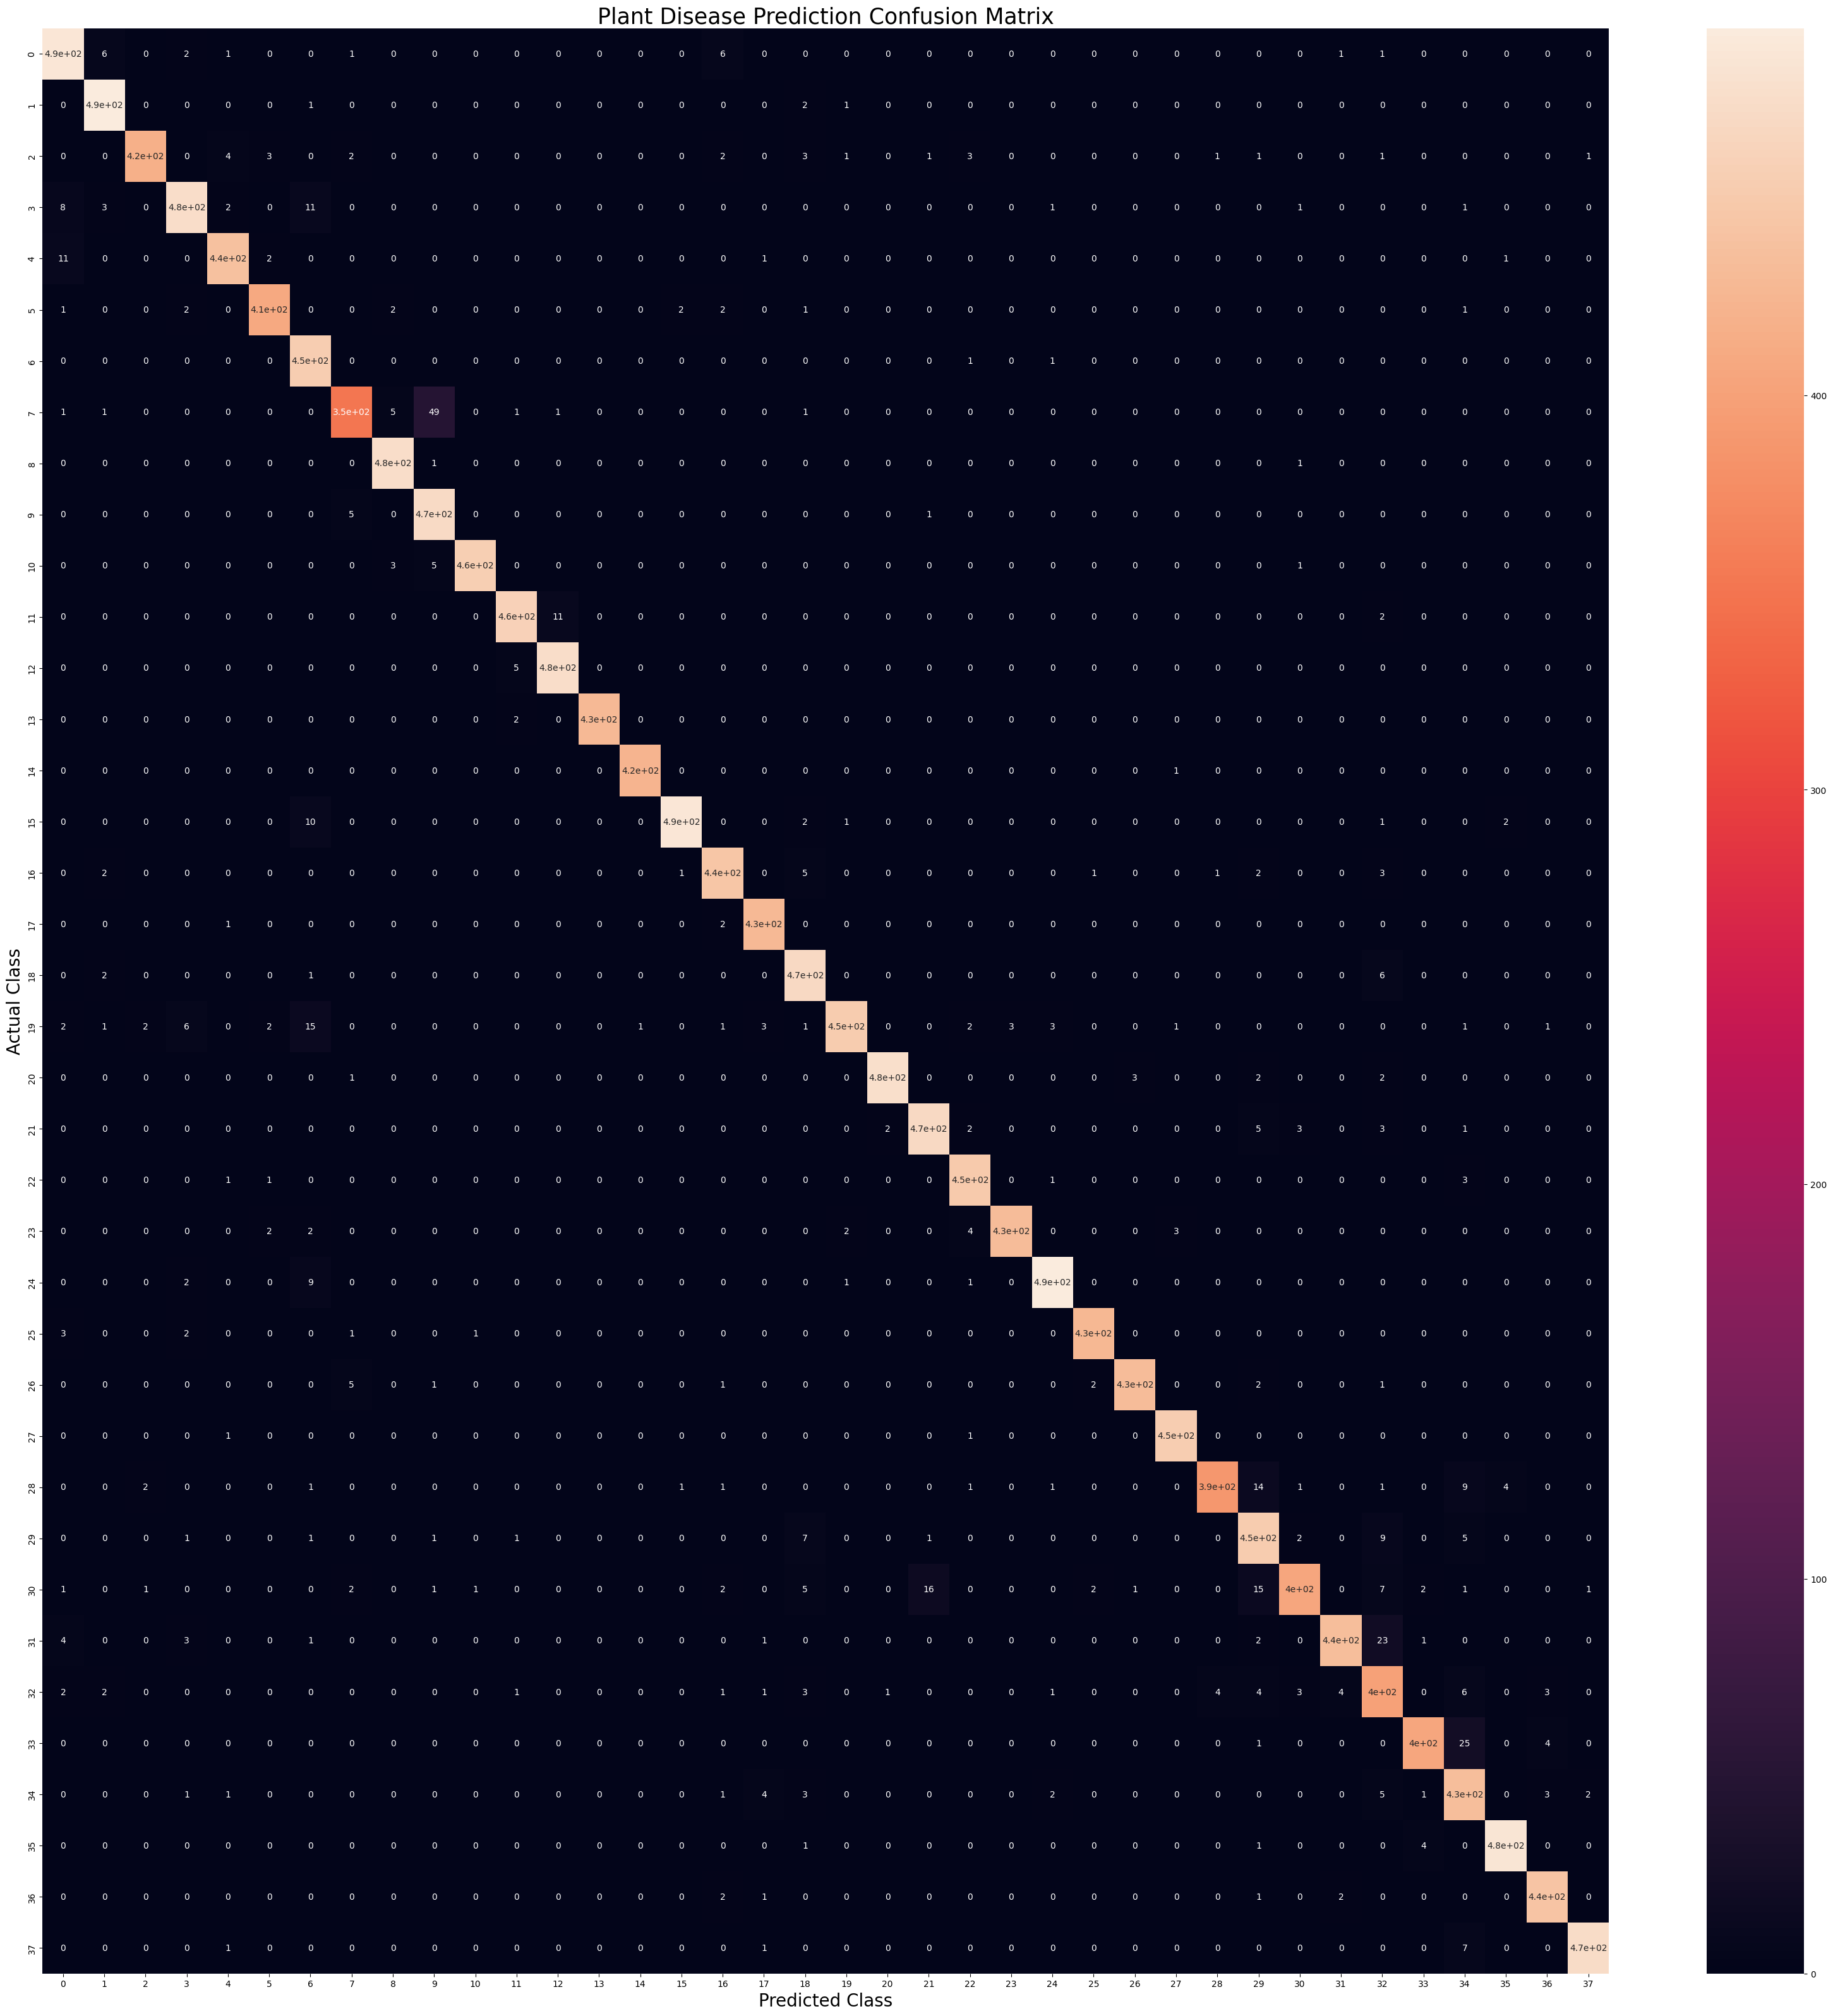

In [72]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()